In [1]:
import numpy as np
from keras.datasets import mnist
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D,AveragePooling2D
from keras.regularizers import l2
from sklearn.cross_validation import StratifiedKFold
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
from sklearn.utils import shuffle
import keras
import csv
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
seed = 7
np.random.seed(seed)

In [3]:
train = pd.read_csv('./input/train_x.csv',header=None)
train_x = train.values

In [4]:
train.sample(2)

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
29430,24.0,108.0,170.0,178.0,177.0,177.0,174.0,174.0,168.0,159.0,...,178.0,174.0,178.0,173.0,169.0,167.0,161.0,154.0,147.0,138.0
27750,115.0,121.0,133.0,138.0,147.0,154.0,161.0,168.0,174.0,178.0,...,170.0,177.0,177.0,174.0,44.0,3.0,10.0,16.0,24.0,30.0


In [5]:
def normalize1(array):
    # Normalize the data
    array = array.astype(np.float32) / 255.0 
    a = array-array.mean(axis=1,keepdims=True)
    a = a / array.std(axis = 1,keepdims = True)
    return a


In [6]:
def normalize2(array):
    # Normalize the data
    array = array.astype(np.float32) / 255.0 
    return array

In [7]:
train_x = normalize2(train_x)

In [8]:
train_x = train_x.reshape(train_x.shape[0],1,64,64)

In [9]:
def encode(array):
    classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
               11, 12, 13, 14, 15, 16, 17, 18, 20,
               21, 24, 25, 27, 28, 30, 32, 35, 36,
               40, 42, 45, 48, 49, 54, 56, 63, 64, 72, 81]
    n_elem = 40
    one_hot = []
    for elem in array:
        #print (elem)
        one_hot_example = np.zeros(n_elem)
        one_hot_example[classes.index(elem)] = 1
        one_hot.append(one_hot_example.astype(int))
    return np.array(one_hot)

In [10]:
result = pd.read_csv('./input/train_y.csv',header=None)

#train_y = encode(result.values.ravel())
train_y = np_utils.to_categorical(result.values.ravel())

In [11]:
train_xs, test_xs, train_ys, test_ys= train_test_split(train_x, train_y, test_size=0.05)
print(train_xs.shape)
print(test_xs.shape)

(47500, 1, 64, 64)
(2500, 1, 64, 64)


In [12]:
num_classes = train_y.shape[1]
print ('Number of classes: {0}'.format(num_classes))

Number of classes: 40


In [13]:
def larger_model():
    model = Sequential()
    model.add(Convolution2D(64, 7, 7, border_mode='valid', input_shape=(1, 64, 64), activation='relu'))
    model.add(Convolution2D(64, 7, 7, activation='relu'))    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(64, 5, 5, activation='relu'))
    model.add(Convolution2D(64, 5, 5, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [14]:
def larger_model2():
    # create model
    model = Sequential()
    model.add(Convolution2D(64, 7, 7, border_mode='valid', input_shape=(1, 64, 64), activation='relu'))
    model.add(Convolution2D(64, 7, 7, activation='relu'))    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(64, 5, 5, activation='relu'))
    model.add(Convolution2D(64, 5, 5, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(BatchNormalization(epsilon=1e-05,momentum=0.99,weights=None,beta_init='zero',gamma_init='one',gamma_regularizer=None,beta_regularizer=None))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [15]:
def larger_model3():
    # create model
    model = Sequential()
    model.add(Convolution2D(64, 7, 7, border_mode='valid', input_shape=(1, 64, 64), activation='relu'))
    model.add(Convolution2D(64, 7, 7, activation='relu'))    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(BatchNormalization(epsilon=1e-05,momentum=0.99,weights=None,beta_init='zero',gamma_init='one',gamma_regularizer=None,beta_regularizer=None))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [16]:
def larger_model4():
    # create model
    model = Sequential()
    model.add(Convolution2D(64, 7, 7, border_mode='valid', input_shape=(1, 64, 64), activation='relu'))
    model.add(Convolution2D(64, 7, 7, activation='relu'))    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(BatchNormalization(epsilon=1e-05,momentum=0.99,weights=None,beta_init='zero',gamma_init='one',gamma_regularizer=None,beta_regularizer=None))
    model.add(Dense(800, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(300, activation='relu'))
    #model.add(Dense(200, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [17]:
# build the model
model = larger_model4()
# fit the model
# fit the model
history = model.fit(train_xs, train_ys, nb_epoch=200, batch_size=200, verbose=1,validation_data=(test_xs, test_ys))
#history = model.fit(train_x, train_y, nb_epoch=120, batch_size=200, verbose=1)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (7, 7), activation="relu", input_shape=(1, 64, 64..., padding="valid")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (7, 7), activation="relu")`
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5

Train on 47500 samples, validate on 2500 samples
Epoch 1/200
47500/47500 [==============================] - 73s 2ms/step - loss: 3.4574 - acc: 0.1054 - val_loss: 3.3816 - val_acc: 0.1156
Epoch 2/200
47500/47500 [==============================] - 48s 1ms/step - loss: 3.4105 - acc: 0.1125 - val_loss: 3.7519 - val_acc: 0.1156
Epoch 3/200
47500/47500 [==============================] - 48s 1ms/step - loss: 3.3521 - acc: 0.1207 - val_loss: 3.4745 - val_acc: 0.0600
Epoch 4/200
47500/47500 [==============================] - 48s 1ms/step - loss: 3.2433 - acc: 0.1458 - val_loss: 3.2019 - val_acc: 0.1492
Epoch 5/200
47500/47500 [==============================] - 48s 1ms/step - loss: 3.1121 - acc: 0.1560 - val_loss: 3.0079 - val_acc: 0.1660
Epoch 6/200
47500/47500 [==============================] - 48s 1ms/step - loss: 2.9525 - acc: 0.1716 - val_loss: 2.9059 - val_acc: 0.1796
Epoch 7/200
47500/47500 [==============================] - 48s 1ms/step - loss: 2.7474 - acc: 0.1904 - val_loss: 2.6555 - v

47500/47500 [==============================] - 48s 1ms/step - loss: 0.1475 - acc: 0.9615 - val_loss: 0.5894 - val_acc: 0.8992
Epoch 58/200
47500/47500 [==============================] - 48s 1ms/step - loss: 0.1558 - acc: 0.9589 - val_loss: 0.5522 - val_acc: 0.9104
Epoch 59/200
47500/47500 [==============================] - 48s 1ms/step - loss: 0.1554 - acc: 0.9605 - val_loss: 0.5718 - val_acc: 0.9020
Epoch 60/200
47500/47500 [==============================] - 48s 1ms/step - loss: 0.1456 - acc: 0.9620 - val_loss: 0.5909 - val_acc: 0.9092
Epoch 61/200
47500/47500 [==============================] - 48s 1ms/step - loss: 0.1440 - acc: 0.9623 - val_loss: 0.5540 - val_acc: 0.9128
Epoch 62/200
47500/47500 [==============================] - 48s 1ms/step - loss: 0.1539 - acc: 0.9606 - val_loss: 0.5453 - val_acc: 0.9032
Epoch 63/200
47500/47500 [==============================] - 48s 1ms/step - loss: 0.1390 - acc: 0.9636 - val_loss: 0.4978 - val_acc: 0.9156
Epoch 64/200
47500/47500 [==============

47500/47500 [==============================] - 48s 1ms/step - loss: 0.0571 - acc: 0.9859 - val_loss: 0.5379 - val_acc: 0.9280
Epoch 167/200
47500/47500 [==============================] - 48s 1ms/step - loss: 0.0699 - acc: 0.9829 - val_loss: 0.5806 - val_acc: 0.9196
Epoch 168/200
47500/47500 [==============================] - 48s 1ms/step - loss: 0.0858 - acc: 0.9801 - val_loss: 0.6406 - val_acc: 0.9164
Epoch 169/200
47500/47500 [==============================] - 48s 1ms/step - loss: 0.0573 - acc: 0.9853 - val_loss: 0.5804 - val_acc: 0.9248: 9s - loss: 0.0590 - acc: 0.985 - ETA: 9s - loss: 0.0588 - acc: 0.985 - ETA: 9s - loss: 0.0591 - acc:
Epoch 170/200
47500/47500 [==============================] - 48s 1ms/step - loss: 0.0500 - acc: 0.9872 - val_loss: 0.5488 - val_acc: 0.9240
Epoch 171/200
47500/47500 [==============================] - 48s 1ms/step - loss: 0.0556 - acc: 0.9867 - val_loss: 0.6312 - val_acc: 0.9196
Epoch 172/200
47500/47500 [==============================] - 48s 1ms/ste

In [18]:
score = model.evaluate(test_xs, test_ys, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2500/2500 [==============================] - 1s 546us/step
Test loss: 0.567544103667
Test accuracy: 0.9148


In [ ]:
#insert code to print the tensorboard graph
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

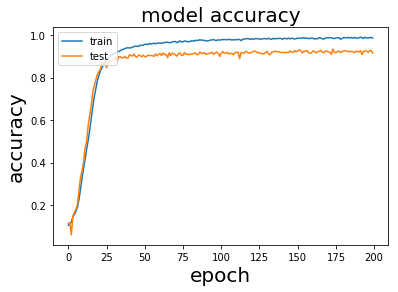

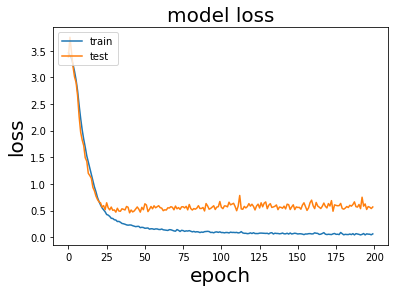

In [19]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy', fontsize=20)
plt.ylabel('accuracy', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
#saving the trained model
# serialize model to JSON
model_json = model.to_json()
slnum=23
with open("model{0}.json".format(slnum), "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model{0}.h5".format(slnum))
print("Saved model to disk")

Saved model to disk


In [21]:
test = pd.read_csv('./input/test_x.csv',header=None)
test_x = normalize2(test.values)
test_x = test_x.reshape(test_x.shape[0],1,64,64)

test_x.shape

(10000, 1, 64, 64)

In [22]:
# predict on the test dadaset
classes = model.predict_classes(test_x, batch_size=200)
proba = model.predict_proba(test_x, batch_size=200)

# save the classes and probability for each prediction in the test dataset
#np.savetxt("./output/classes_sample_kaggle_{0}.csv".format(slnum),classes, delimiter =",")
#np.savetxt("./output/probabilities_model_{0}.csv".format(slnum),proba, delimiter =",")

10000/10000 [==============================] - 4s 357us/step


In [25]:
classes

array([19, 14, 12, ...,  0, 12,  4])

In [31]:
def decode(array):
    classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
               11, 12, 13, 14, 15, 16, 17, 18, 20,
               21, 24, 25, 27, 28, 30, 32, 35, 36,
               40, 42, 45, 48, 49, 54, 56, 63, 64, 72, 81]
    n_elem = 40
    decoded = np.zeros(array.shape[0])
    for i,elem in enumerate(array):
        #print (elem)
        decoded[i] = classes[elem]
    return decoded

In [33]:
classes = decode(classes)

In [34]:
classes

array([ 20.,  14.,  12., ...,   0.,  12.,   4.])

In [35]:
writer = open('./output/Final_{0}.csv'.format(slnum), 'w')
writer.write('Id,Label\n')
for i,row in enumerate(classes):
    writer.write(str(i+1)+","+str(row)+"\n")
writer.close()


In [55]:
def change_simple(array):
    idx = []
    for i in array:
        idx.append(np.where(i==1)[0][0])
    return np.array(idx)

In [56]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [57]:
decode(change_simple(test_ys))

array([ 10.,  45.,  16., ...,  18.,  35.,  10.])

2500/2500 [==============================] - 1s 474us/step


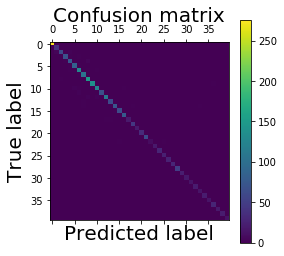

In [66]:
cm = confusion_matrix(decode(change_simple(test_ys)), decode(model.predict_classes(test_xs)))
plt.matshow(cm)
plt.title('Confusion matrix', fontsize=20,y=1.08)
plt.colorbar()
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.savefig("cMatrix_{0}.png".format(slnum), dpi=300)
plt.show()

In [44]:
a=encode(decode(model.predict_classes(test_xs)))

2500/2500 [==============================] - 1s 399us/step


In [46]:
a.shape

(2500, 40)

In [47]:
test_ys.shape

(2500, 40)

In [63]:
cm

array([[276,   2,   1, ...,   0,   0,   0],
       [  0,  39,   1, ...,   0,   0,   0],
       [  0,   4,  60, ...,   0,   0,   0],
       ..., 
       [  0,   0,   0, ...,  19,   0,   0],
       [  0,   0,   0, ...,   1,  21,   1],
       [  0,   0,   0, ...,   0,   0,  14]])